# Diversified Portfolio using correlation matrix
It is commonly known that a well-diversified portfolio benefits from having assets with low correlation between different groups, while assets within each group should ideally have high correlation.
This project will focus on constructing a portfolio based solely on the correlation matrix, and then analyze how the portfolio performs. 


We will fetch data from the SP500 using yfinance library in Python: this is also the benchmark. It's suggested that using Adj Close is more optimal but unfortunately I could no longer fetch it, I will continue using Close price.

In [183]:
import pandas as pd
import requests
import yfinance as yf
import numpy as np
from io import StringIO
URL = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(URL).text
table = pd.read_html(StringIO(response))
tickers = table[0]["Symbol"].tolist()
tickers = [ticker.replace('.', '-') for ticker in tickers]

price = yf.download(tickers, period="2y", interval="1d")
close = price["Close"]
close.dropna(axis=1)


[*********************100%***********************]  503 of 503 completed


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-22,131.850464,156.254211,142.504913,121.169998,93.035690,62.635689,246.368332,361.709991,180.122421,72.198296,...,219.861832,27.268793,103.501610,59.712704,97.679695,95.264450,122.823189,123.363052,288.109985,158.246567
2023-03-23,129.287033,157.343231,144.016479,120.300003,93.208580,62.378941,264.257233,369.000000,182.863708,70.472359,...,220.134354,26.786077,103.942032,58.930805,96.577667,94.932495,122.861679,122.939995,288.750000,158.109268
2023-03-24,130.105347,158.650040,146.538849,116.919998,94.178703,62.806850,264.587921,374.959991,181.164902,71.860603,...,220.163544,27.013237,104.313965,61.015869,96.689735,96.260338,123.006012,124.002556,288.730011,160.992188
2023-03-27,131.199768,156.699738,146.093735,117.910004,94.572510,63.120640,266.494476,373.149994,178.346405,72.929932,...,221.360611,27.164679,104.079063,60.773846,98.809753,97.060974,123.448647,123.963196,288.859985,162.492462
2023-03-28,130.765930,156.076004,146.752167,116.610001,93.275810,63.529530,267.506165,373.399994,177.217087,73.680336,...,223.248672,26.899658,104.930565,60.876236,100.042542,97.607727,123.650734,124.337776,290.149994,161.835464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-17,122.489998,214.000000,214.470001,126.940002,127.639999,95.279999,325.709991,399.339996,211.679993,47.990002,...,328.329987,29.959999,86.419998,69.959999,113.760002,123.080002,157.130005,111.790001,285.269989,165.169998
2025-03-18,123.099998,212.690002,213.850006,124.559998,126.300003,93.300003,324.070007,391.369995,209.160004,47.680000,...,334.970001,29.860001,85.430000,70.279999,113.639999,120.919998,157.300003,112.879997,282.579987,164.429993
2025-03-19,122.209999,215.240005,212.250000,126.000000,127.419998,93.190002,324.470001,387.890015,209.970001,46.930000,...,334.510010,29.910000,85.050003,70.239998,115.410004,121.309998,157.509995,112.910004,285.829987,163.750000


I then compute daily returns for the stock in order to compute a correlation matrix. For faster observation, I'll use the sort value to show top 100 pairs with highest correlation, as long as the correlation > = 0.8. 

In [215]:
returns = close.pct_change()
correlation_matrix = returns.corr()
sorted = correlation_matrix.unstack().sort_values().drop_duplicates()
sorted = sorted.sort_values(ascending=False, kind="quicksort")
filter_table = sorted[:100]
filter_table

Ticker  Ticker
ZTS     ZTS       1.000000
GOOGL   GOOG      0.997718
FOX     FOXA      0.985148
NWSA    NWS       0.974723
AVB     EQR       0.917585
                    ...   
MAA     AVB       0.800615
RSG     WM        0.800541
DUK     WEC       0.800500
ESS     CPT       0.799879
FANG    DVN       0.799829
Length: 100, dtype: float64

then group tickers that show a high correlation into clusters. I will use nx.find_cliques(G) returns all maximal cliques, making sure that groups like A-B-C only exist if A is connected to C (forming a triangle/clique). In simple terms, if A-B and B-C are highly correlated, in order to form a group A-B-C, A-C must also have to be highly correlated.

In [216]:
import networkx as nx
G = nx.Graph()
for (ticker1, ticker2), correlation in filter.items():
    G.add_edge(ticker1, ticker2)
    
groups = list(nx.find_cliques(G))
groups

[['FOXA', 'FOX'],
 ['MLM', 'VMC'],
 ['DTE', 'CMS', 'PPL', 'LNT', 'WEC'],
 ['MAA', 'AVB', 'UDR', 'CPT'],
 ['WM', 'RSG'],
 ['NUE', 'STLD'],
 ['SBAC', 'AMT'],
 ['DVN', 'FANG'],
 ['DVN', 'EOG'],
 ['VLO', 'PSX'],
 ['VLO', 'MPC'],
 ['LOW', 'HD'],
 ['NCLH', 'CCL'],
 ['PSA', 'EXR'],
 ['PPL', 'EVRG', 'LNT'],
 ['NWS', 'NWSA'],
 ['CPT', 'ESS', 'EQR', 'AVB', 'UDR'],
 ['EXC', 'AEE'],
 ['DAL', 'UAL'],
 ['SYF', 'COF'],
 ['LYB', 'DOW'],
 ['GOOGL', 'GOOG'],
 ['FRT', 'KIM', 'REG'],
 ['WMB', 'KMI'],
 ['PHM', 'NVR', 'LEN', 'DHI'],
 ['MET', 'PRU'],
 ['CDNS', 'SNPS'],
 ['ED', 'CMS', 'WEC'],
 ['EOG', 'COP'],
 ['HAL', 'SLB'],
 ['LRCX', 'AMAT', 'KLAC'],
 ['DUK', 'WEC'],
 ['DUK', 'SO'],
 ['WEC', 'AEE', 'LNT'],
 ['MA', 'V'],
 ['NXPI', 'ADI', 'MCHP'],
 ['MS', 'GS'],
 ['CVX', 'HES'],
 ['HLT', 'MAR'],
 ['TXN', 'ADI'],
 ['CFG', 'HBAN', 'TFC'],
 ['CFG', 'HBAN', 'RF', 'FITB', 'PNC', 'MTB'],
 ['CFG', 'HBAN', 'RF', 'FITB', 'USB'],
 ['CFG', 'HBAN', 'RF', 'FITB', 'KEY'],
 ['ZTS']]

Naming the groups with numbers for easier tracking

In [213]:
group_names = [i + 1 for i in range(len(groups))]
named_groups = {group_name: groups for group_name, groups in zip(group_names, groups)}
for name, group in named_groups.items():
    print(f"{name}: {group}")

1: ['FOXA', 'FOX']
2: ['MLM', 'VMC']
3: ['DTE', 'CMS', 'PPL', 'LNT', 'WEC']
4: ['MAA', 'AVB', 'UDR', 'CPT']
5: ['WM', 'RSG']
6: ['NUE', 'STLD']
7: ['SBAC', 'AMT']
8: ['DVN', 'FANG']
9: ['DVN', 'EOG']
10: ['VLO', 'PSX']
11: ['VLO', 'MPC']
12: ['LOW', 'HD']
13: ['NCLH', 'CCL']
14: ['PSA', 'EXR']
15: ['PPL', 'EVRG', 'LNT']
16: ['NWS', 'NWSA']
17: ['CPT', 'ESS', 'EQR', 'AVB', 'UDR']
18: ['EXC', 'AEE']
19: ['DAL', 'UAL']
20: ['SYF', 'COF']
21: ['LYB', 'DOW']
22: ['GOOGL', 'GOOG']
23: ['FRT', 'KIM', 'REG']
24: ['WMB', 'KMI']
25: ['PHM', 'NVR', 'LEN', 'DHI']
26: ['MET', 'PRU']
27: ['CDNS', 'SNPS']
28: ['ED', 'CMS', 'WEC']
29: ['EOG', 'COP']
30: ['HAL', 'SLB']
31: ['LRCX', 'AMAT', 'KLAC']
32: ['DUK', 'WEC']
33: ['DUK', 'SO']
34: ['WEC', 'AEE', 'LNT']
35: ['MA', 'V']
36: ['NXPI', 'ADI', 'MCHP']
37: ['MS', 'GS']
38: ['CVX', 'HES']
39: ['HLT', 'MAR']
40: ['TXN', 'ADI']
41: ['CFG', 'HBAN', 'TFC']
42: ['CFG', 'HBAN', 'RF', 'FITB', 'PNC', 'MTB']
43: ['CFG', 'HBAN', 'RF', 'FITB', 'USB']
44: ['CFG', '

After forming different groups, check the correlation BETWEEN groups. 

In [123]:
#correlation between group
group_returns = {}
for name, group in named_groups.items():
    close_group = yf.download(group, period="2y", interval="1d")["Close"]
    returns_group = close_group.pct_change()  
    group_avg_return = returns_group.mean(axis=1) 
    group_returns[name] = group_avg_return
    
group_returns_df = pd.DataFrame(group_returns)
corr_group_matrix = group_returns_df.corr()
#(corr_group_matrix)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%********

Similar to the previous step, to speed up the process, I will sort the values from lowest to highest. I'll adjust the top number to 65, as long as the correlation remains low, approximately around 0

In [124]:
e = corr_group_matrix.unstack().sort_values().drop_duplicates()
e = e.sort_values(ascending=True, kind="quicksort")
filter_group = e[:65]
filter_group

15  6    -0.205726
    12   -0.200987
2   15   -0.092679
12  24   -0.079608
24  6    -0.045130
            ...   
29  1     0.105092
28  6     0.105100
22  13    0.106879
31  29    0.109561
    26    0.111213
Length: 65, dtype: float64

Still similar to the previous step, I then group groups that show a low correlation into cluster(portfolio). Each cluster down below will represent a portfolio.

In [217]:
G = nx.Graph()

for (group1, group2), correlation in filter_group.items():
    G.add_edge(group1, group2)
    
clusters = list(nx.find_cliques(G))
for cluster in clusters:
    print(cluster)


[1, 27]
[1, 12, 26]
[1, 12, 13]
[1, 29]
[5, 2]
[5, 12]
[5, 6]
[8, 11]
[8, 3]
[10, 2]
[10, 12]
[10, 6]
[11, 24, 2]
[11, 24, 12]
[11, 24, 6]
[11, 23]
[12, 24, 26]
[12, 24, 13]
[12, 3]
[12, 28]
[12, 15]
[15, 2, 29]
[15, 6]
[15, 14]
[15, 17]
[15, 20]
[15, 23]
[15, 27]
[17, 24]
[18, 2]
[23, 26]
[23, 13]
[24, 2, 26]
[24, 2, 13]
[24, 2, 29]
[24, 14]
[24, 22, 26]
[24, 22, 13]
[24, 27]
[28, 2]
[28, 6]
[31, 2, 13]
[31, 2, 26]
[31, 2, 3]
[31, 2, 29]
[31, 4]
[31, 6]
[31, 7]
[31, 9]
[31, 14]
[31, 19]
[31, 22, 26]
[31, 22, 13]
[31, 27]


We could use a heatmap to check correlation between groups.

<Axes: >

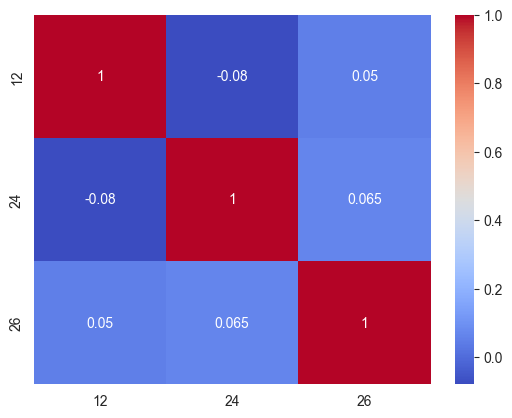

In [218]:
import seaborn as sns
chosen = [12, 24, 26]
filtered_corr_matrix = corr_group_matrix.loc[chosen, chosen]
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')

I'll randomly select a portfolio to see its performance. Ideally, each portfolio should be compared to the benchmark. I will choose the portfolio that has [12, 24, 26]

In [208]:
list_final = ['LOW','WMB','KMI','MET','PRU']
len(list_final)

5

From only a list of 5 stocks, let's compute the daily returns then compare it with the benchmark SP500

In [209]:
close_list = close[list_final ]
returns_list = close_list.pct_change()
list_avg_return = returns_list.mean(axis=1).dropna()

sp500_df = yf.download("^GSPC", period="2y", interval="1d")['Close']
sp500_returns = sp500_df.pct_change().dropna()
comparison = pd.concat([list_avg_return, sp500_returns], axis=1)


comparison.columns = ['portfolio_return', 'spx_index_return']
comparison


[*********************100%***********************]  1 of 1 completed


,portfolio_return,spx_index_return
Date,,
2023-03-23,-0.017242,0.002985
2023-03-24,0.008839,0.005640
2023-03-27,0.013855,0.001647
2023-03-28,-0.000305,-0.001574
2023-03-29,0.015215,0.014237
...,...,...
2025-03-17,0.017931,0.006416
2025-03-18,-0.006740,-0.010654
2025-03-19,0.012830,0.010798


I will plot a line chart to observe the trend. Since I'm using daily returns, the chart may appear a bit difficult to interpret, but it seems that the portfolio moves fairly in line with the benchmark.

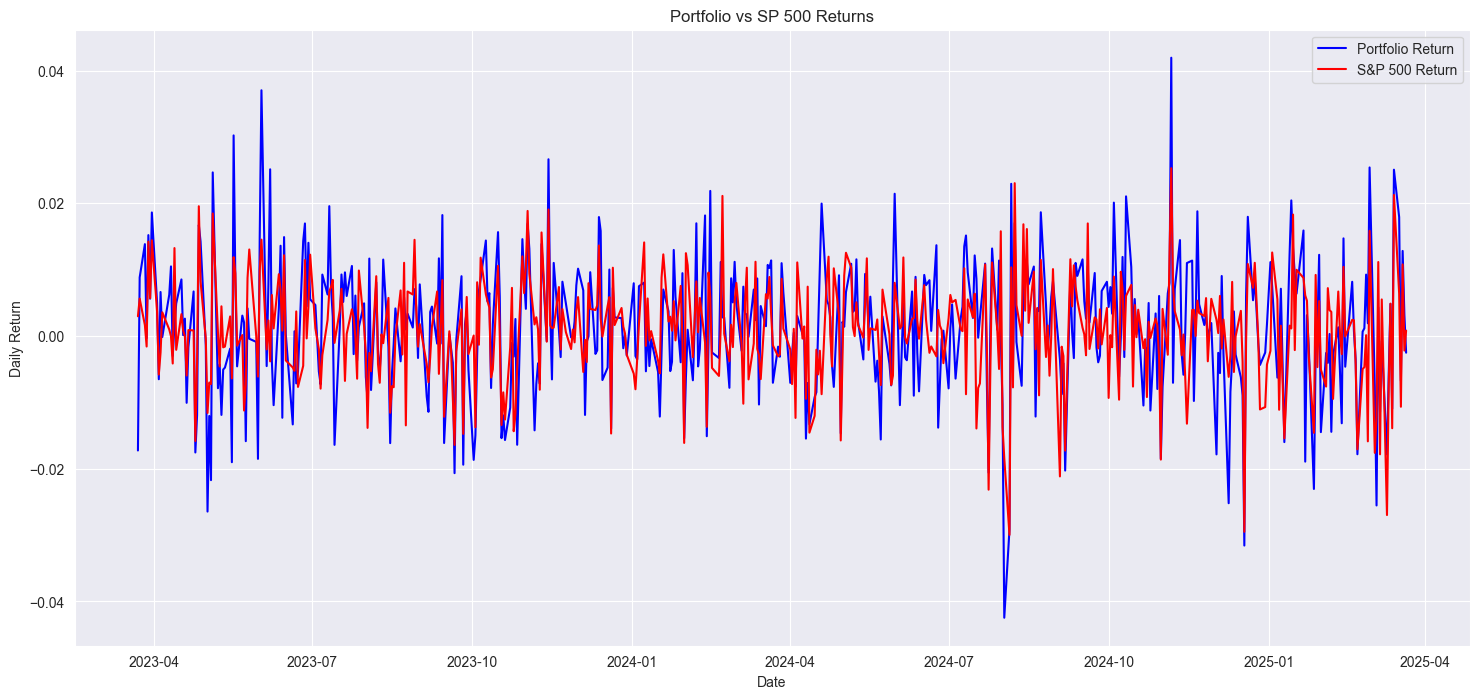

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,8))
plt.plot(comparison.index, comparison['portfolio_return'], label='Portfolio Return', color='blue')
plt.plot(comparison.index, comparison['spx_index_return'], label='S&P 500 Return', color='red')
plt.title("Portfolio vs SP 500 Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.show()

Final step: I will compute additional key metrics to evaluate how this 9-stock portfolio performs compared to the SP 500

In [211]:
annual_portfolio_return = comparison['portfolio_return'].mean() * 25200  # annualized (252 trading days in a year)
annual_sp500_return = comparison['spx_index_return'].mean() * 25200 
annual_excess_return = annual_portfolio_return - annual_sp500_return  

#annual volatility
annual_volatility = comparison['portfolio_return'].std() * np.sqrt(252)*100  
annual_volatility_sp500 = comparison['spx_index_return'].std() * np.sqrt(252)*100

#beta
covariance = np.cov(comparison['portfolio_return'], comparison['spx_index_return'])[0, 1]
variance_sp500 = np.var(comparison['spx_index_return'])
beta = covariance / variance_sp500

print(f"Portfolio Annual Return: {annual_portfolio_return:.4f}%")
print(f"SP500 Annual Return: {annual_sp500_return:.4f}%")
print(f"Portfolio Annual Excess Return: {annual_excess_return:.4f}%")
print(f"Portfolio Annual Volatility: {annual_volatility:.4f}%")
print(f"Sp500 Annual Volatility: {annual_volatility_sp500:.4f}%")
print(f"Beta of the portfolio relative to S&P 500 {beta:.4f}")

Portfolio Annual Return: 28.0781%
SP500 Annual Return: 19.1389%
Portfolio Annual Excess Return: 8.9392%
Portfolio Annual Volatility: 16.1614%
Sp500 Annual Volatility: 12.6996%
Beta of the portfolio relative to S&P 500 0.7843


In [212]:
corr_comparison = comparison.corr()
corr_comparison

,portfolio_return,spx_index_return
portfolio_return,1.000000,0.615067
spx_index_return,0.615067,1.000000


# Summary:
In summary, for better diversification, a portfolio should include a broader range of assets. While the returns may appear pretty promising, I highly doubt this is due to the portfolio management method used in this project—it's likely a coincidence. All of the limitations have been addressed throughout each step. 
P/s: it would be ideal to compare every portfolio against the benchmark, maybe next time.